In [1]:
import pickle

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import config

In [2]:
GROUP_LABELS = ['Golden', 'Synthetic: Backward', 'Synthetic: Forward', 'Synthetic: Backward → Forward',
                'Synthetic: All']

In [3]:
def load_data(s):
    with open(config.OUTPUT_CHARTS_DIR / f"{s}_data.pkl", 'rb') as f:
        groups = pickle.load(f)

        data = []
        for i, group in enumerate(groups):
            for e in group:
                data.append({
                    'Subset': GROUP_LABELS[i],
                    'value': e
                })
        return pd.DataFrame.from_records(data)

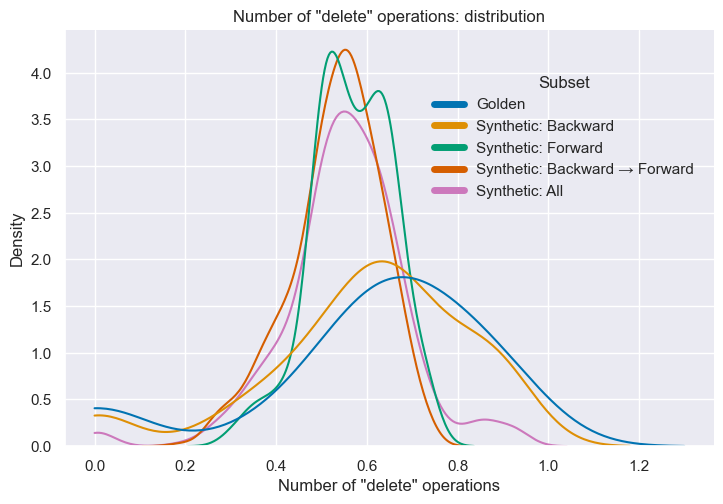

In [4]:
name = 'deletions_norm'

sns.set_theme(palette="colorblind")

ax = sns.displot(data=load_data(name), 
                 x='value', 
                 hue='Subset', 
                 kind='kde',
                 aspect=1.5, 
                 common_norm=False,
                 clip=(0, 10000))
sns.move_legend(ax, "center right", bbox_to_anchor=(.70, .75))
for line in ax.legend.get_lines():
    line.set_linewidth(5.0)

plt.title("Number of \"delete\" operations: distribution")
plt.xlabel("Number of \"delete\" operations")

plt.savefig(config.OUTPUT_CHARTS_DIR / f"{name}_dist.png",bbox_inches='tight')
plt.savefig(config.OUTPUT_CHARTS_DIR / f"{name}_dist.svg",bbox_inches='tight')
plt.show()

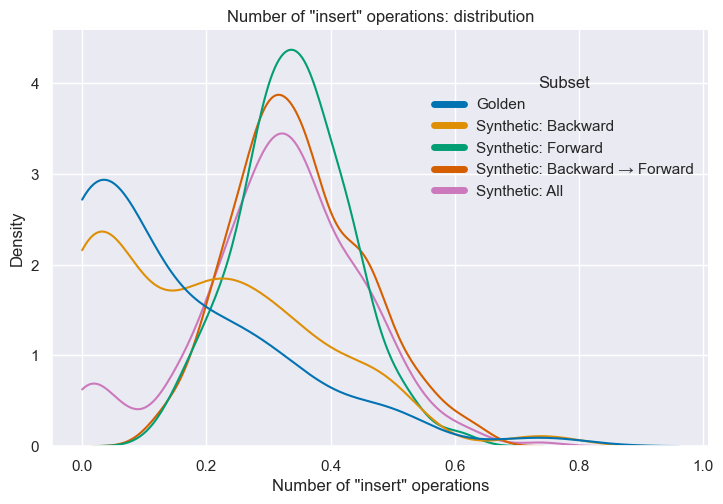

In [5]:
name = 'insertions_norm'

sns.set_theme(palette="colorblind")

ax = sns.displot(data=load_data(name), 
                 x='value', 
                 hue='Subset', 
                 kind='kde',
                 aspect=1.5, 
                 common_norm=False,
                 clip=(0, 10000))
sns.move_legend(ax, "center right", bbox_to_anchor=(.70, .75))
for line in ax.legend.get_lines():
    line.set_linewidth(5.0)

plt.title("Number of \"insert\" operations: distribution")
plt.xlabel("Number of \"insert\" operations")

plt.savefig(config.OUTPUT_CHARTS_DIR / f"{name}_dist.png",bbox_inches='tight')
plt.savefig(config.OUTPUT_CHARTS_DIR / f"{name}_dist.svg",bbox_inches='tight')
plt.show()